In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

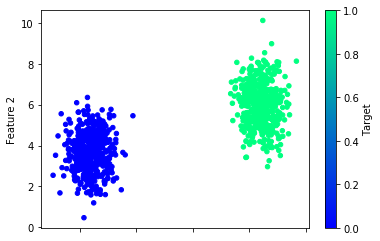

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7078 - accuracy: 0.4787
Epoch 2/100
750/750 [==============================] - 0s 52us/sample - loss: 0.6991 - accuracy: 0.5107
Epoch 3/100
750/750 [==============================] - 0s 43us/sample - loss: 0.6916 - accuracy: 0.5280
Epoch 4/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6844 - accuracy: 0.5600
Epoch 5/100
750/750 [==============================] - 0s 63us/sample - loss: 0.6779 - accuracy: 0.5827
Epoch 6/100
750/750 [==============================] - 0s 57us/sample - loss: 0.6715 - accuracy: 0.6013
Epoch 7/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6649 - accuracy: 0.6173
Epoch 8/100
750/750 [==============================] - 0s 49us/sample - loss: 0.6581 - accuracy: 0.6440
Epoch 9/100
750/750 [==============================] - 0s 56us/sample - loss: 0.6510 - accuracy: 0.6480
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 41us/sample - loss: 0.1412 - accuracy: 0.9880
Epoch 79/100
750/750 [==============================] - 0s 40us/sample - loss: 0.1381 - accuracy: 0.9880
Epoch 80/100
750/750 [==============================] - 0s 44us/sample - loss: 0.1350 - accuracy: 0.9880
Epoch 81/100
750/750 [==============================] - 0s 37us/sample - loss: 0.1321 - accuracy: 0.9880
Epoch 82/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1293 - accuracy: 0.9893
Epoch 83/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1265 - accuracy: 0.9907
Epoch 84/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1239 - accuracy: 0.9920
Epoch 85/100
750/750 [==============================] - 0s 41us/sample - loss: 0.1212 - accuracy: 0.9920
Epoch 86/100
750/750 [==============================] - 0s 39us/sample - loss: 0.1187 - accuracy: 0.9920
Epoch 87/100
750/750 [==============================] - 0s 43us/samp

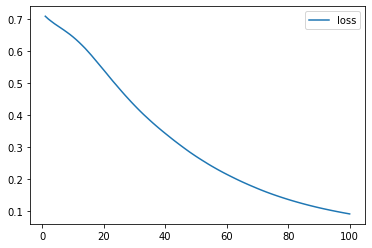

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

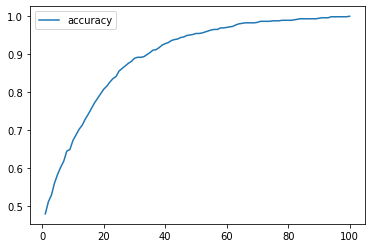

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0827 - accuracy: 1.0000
Loss: 0.08266852819919586, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

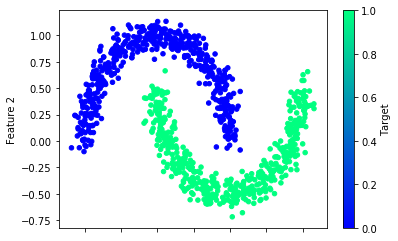

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 549us/sample - loss: 1.3553 - accuracy: 0.3653
Epoch 2/100
750/750 [==============================] - 0s 61us/sample - loss: 1.1585 - accuracy: 0.3947
Epoch 3/100
750/750 [==============================] - 0s 41us/sample - loss: 1.0364 - accuracy: 0.4240
Epoch 4/100
750/750 [==============================] - 0s 55us/sample - loss: 0.9559 - accuracy: 0.4480
Epoch 5/100
750/750 [==============================] - 0s 48us/sample - loss: 0.9005 - accuracy: 0.4720
Epoch 6/100
750/750 [==============================] - 0s 48us/sample - loss: 0.8570 - accuracy: 0.4893
Epoch 7/100
750/750 [==============================] - 0s 49us/sample - loss: 0.8213 - accuracy: 0.5200
Epoch 8/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7909 - accuracy: 0.5387
Epoch 9/100
750/750 [==============================] - 0s 47us/sample - loss: 0.7631 - accuracy: 0.5560
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 44us/sample - loss: 0.2971 - accuracy: 0.8733
Epoch 78/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2958 - accuracy: 0.8733
Epoch 79/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2945 - accuracy: 0.8733
Epoch 80/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2933 - accuracy: 0.8747
Epoch 81/100
750/750 [==============================] - ETA: 0s - loss: 0.2964 - accuracy: 0.87 - 0s 43us/sample - loss: 0.2922 - accuracy: 0.8760
Epoch 82/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2910 - accuracy: 0.8787
Epoch 83/100
750/750 [==============================] - ETA: 0s - loss: 0.2144 - accuracy: 0.96 - 0s 39us/sample - loss: 0.2899 - accuracy: 0.8800
Epoch 84/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2889 - accuracy: 0.8813
Epoch 85/100
750/750 [==============================] - 0s 39us/sample - loss: 0.2879 - a

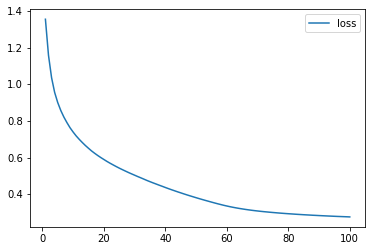

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

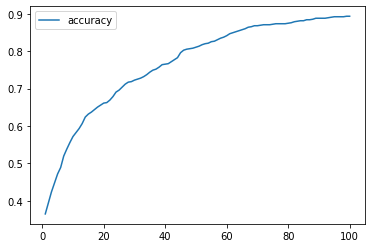

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 619us/sample - loss: 0.9516 - accuracy: 0.1867
Epoch 2/100
750/750 [==============================] - 0s 52us/sample - loss: 0.8846 - accuracy: 0.2467
Epoch 3/100
750/750 [==============================] - 0s 51us/sample - loss: 0.8259 - accuracy: 0.2787
Epoch 4/100
750/750 [==============================] - 0s 57us/sample - loss: 0.7729 - accuracy: 0.3160
Epoch 5/100
750/750 [==============================] - 0s 49us/sample - loss: 0.7259 - accuracy: 0.4053
Epoch 6/100
750/750 [==============================] - 0s 45us/sample - loss: 0.6834 - accuracy: 0.6200
Epoch 7/100
750/750 [==============================] - 0s 48us/sample - loss: 0.6449 - accuracy: 0.6533
Epoch 8/100
750/750 [==============================] - 0s 44us/sample - loss: 0.6098 - accuracy: 0.6720
Epoch 9/100
750/750 [==============================] - 0s 55us/sample - loss: 0.5775 - accuracy: 0.6947
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 41us/sample - loss: 0.2568 - accuracy: 0.8893
Epoch 79/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2566 - accuracy: 0.8893
Epoch 80/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2562 - accuracy: 0.8893
Epoch 81/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2560 - accuracy: 0.8893
Epoch 82/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2555 - accuracy: 0.8893
Epoch 83/100
750/750 [==============================] - 0s 40us/sample - loss: 0.2553 - accuracy: 0.8893
Epoch 84/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2550 - accuracy: 0.8893
Epoch 85/100
750/750 [==============================] - 0s 41us/sample - loss: 0.2548 - accuracy: 0.8907
Epoch 86/100
750/750 [==============================] - 0s 44us/sample - loss: 0.2545 - accuracy: 0.8907
Epoch 87/100
750/750 [==============================] - 0s 43us/samp